# Test

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os  # For Saving to Folder
import pandas as pd
import h5py  # Python Package to do the HDF5.

import socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)
sys.path.append("./Python3/")  # Since now we are in the Root Directory
from hmm_inference import HMM_Analyze   # Do not move. Should be after sys.path..


print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

midway2-0401.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


### Load 1000G 1240k SNP

In [26]:
path_load = "./Data/1000Genomes/HDF5/1240kHDF5/all1240/chr3.hdf5"

f = h5py.File(path_load, "r") # Load for Sanity Check. See below!   
print("Loaded HDF5")
print("Loaded %i variants" % np.shape(f["calldata/GT"])[0])
print("Loaded %i individuals" % np.shape(f["calldata/GT"])[1])
print(list(f["calldata"].keys()))
print(list(f["variants"].keys()))

Loaded HDF5
Loaded 77652 variants
Loaded 2504 individuals
['GT']
['ALT', 'CHROM', 'FILTER_PASS', 'ID', 'MAP', 'POS', 'QUAL', 'REF']


### Calculate Mean Allele Frequencies

In [43]:
%%time
p = np.mean(np.mean(f["calldata/GT"], axis=1), axis=1)

CPU times: user 5.02 s, sys: 240 ms, total: 5.26 s
Wall time: 5.25 s


In [39]:
p_zero = p==0 # Drop Zeros
print(f"Found {np.sum(p_zero)} Fixed Loci. Dropping it...")
p = np.delete(p, np.where(p_zero)[0])
len(p)

Found 0 Fixed Loci. Dropping it...


77651

In [44]:
print(f"Mean Allele Frequency: {np.mean(p):.6f}")

Mean Allele Frequency: 0.316334


### Calculate Exp. Probabilities of Heterozygotes

In [58]:
### Probability of sampling a Heterozygote
het = 2 * p * (1-p)
homo = 1 - 0.5 * het  # Prob of Sampling allele that corresponds to data

In [42]:
log_homo = np.log(homo)
cs = np.cumsum(log_homo)  # Get the cumulative Sum

/software/python-3.7.0-el7-x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


### Plot Histogram of SNPs to go

# Area 51

In [49]:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

In [52]:
%%time
lags=range(1,100)
ac = autocorr1(het,lags)

CPU times: user 92.1 ms, sys: 221 µs, total: 92.3 ms
Wall time: 90.4 ms


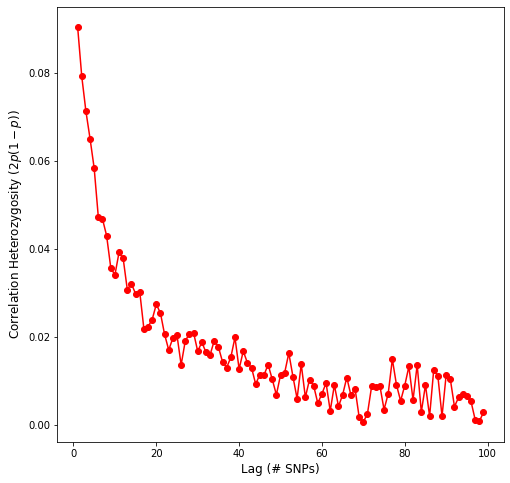

In [60]:
fs=12
plt.figure(figsize = (8,8))
plt.plot(lags, ac, "ro-")
plt.xlabel("Lag (# SNPs)", fontsize=fs)
plt.ylabel(r"Correlation Heterozygosity ($2p(1-p))$", fontsize=fs)
plt.show()

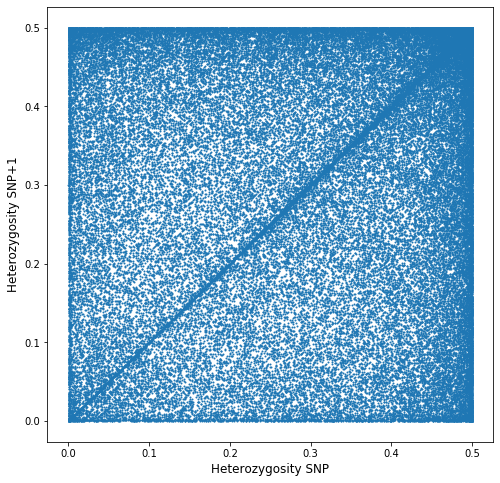

In [62]:
l=1 # The lag
plt.figure(figsize=(8,8))
plt.scatter(het[:-l], het[l:], s=1)
plt.xlabel("Heterozygosity SNP", fontsize=fs)
plt.ylabel("Heterozygosity SNP+1", fontsize=fs)
plt.show()

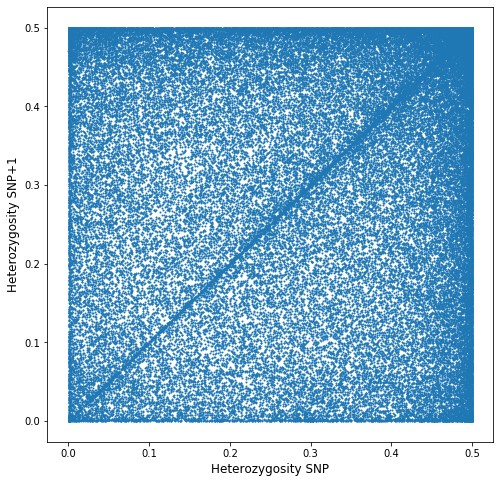

In [61]:
l=2 # The lag
plt.figure(figsize=(8,8))
plt.scatter(het[:-l], het[l:], s=1)
plt.xlabel("Heterozygosity SNP", fontsize=fs)
plt.ylabel("Heterozygosity SNP+1", fontsize=fs)
plt.show()

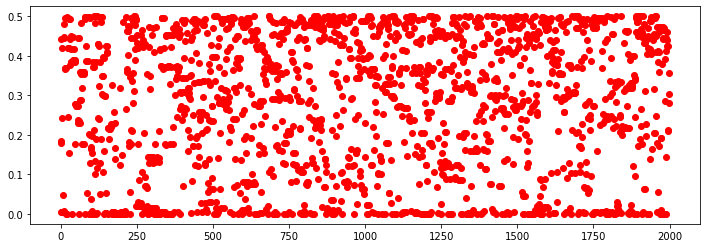

In [21]:
plot_het = het[10000:12000]  # What to Plot

plt.figure(figsize = (12,4))
plt.plot(np.arange(len(plot_het)), plot_het, "ro")
plt.show()

In [ ]:
### Numpy Find 

In [23]:
cs

array([-1.40877764, -3.00100932, -4.76139761, ...,        -inf,
              -inf,        -inf])

In [37]:
np.sum(p==1)

0

In [38]:
np.sum(p==0)

0